# Importing all libraries which are required 

In [34]:
import requests
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim


# Request to  link to get the data

In [35]:
url='http://13.233.13.254:2222/xenergyData.json'
x=requests.get(url)

y=x.content


# Data is in json format , Converting it to python format , Split the data of tdata , creat list

In [36]:
z=json.loads(y)

lst=[]
for i in z.values():
    for r in i :
        for p in r.values():
            lst.append(p)


#print(lst)
lst1=[]
for i in range (len(lst)):
    if i%5==3:
        a=re.split(',',lst[i])
        lst1.append(a)
    if i%5==4:
        lst1.append(lst[i])
#print(lst1)


# Creating a Dictionary 

# Sorting and Appending the data from the list of strings to the keyvalue list 

###  Identify the status of battery i.e- Charing / Discharging.

### Identify the battery which has <20% charging and not on Charging to have  ALERT: LOW BATTERY.


In [37]:
Data = {'Device IMEI':[],'Latitude':[],'Longitude':[],'Cell 1 (in mV)':[],'Cell 2 (in mV)':[],'Cell 3 (in mV)':[],
               'Cell 4 (in mV)':[],'Cell 5 (in mV)':[],'Cell 6 (in mV)':[],'Cell 7 (in mV)':[],'Cell 8 (in mV)':[],
        'Cell 9 (in mV)':[],'Cell 10 (in mV)':[],'Cell 11 (in mV)':[],'Cell 12 (in mV)':[],'Cell 13 (in mV)':[],
        'Cell 14 (in mV)':[],'Avg Cell Voltages (in mV)':[],'Pack Voltage (in mV)':[],'Current(in mAmp)':[],
        'Battery Per(in %)':[],'Send Alert (low battery{<20%})':[],'Status of Battery (Discharge=0,Charge=1)':[],"Created":[] }
lst2=[]
for i in range (len(lst1)):
    if i%2==0:
        #print(len(lst1[i]))
        lst3=[]
        lst2.append(lst3)
        for r in range (len(lst1[i])-6):
            if r%21==0:
                Data['Device IMEI'].append(lst1[i][r])
            if r%21==1:
                Data['Latitude'].append(float(lst1[i][r]))
                n=str(lst1[i][r])
                lst3.append(n)
            if r%21==2:
                Data['Longitude'].append(float(lst1[i][r]))
                m=str(lst1[i][r])
                lst3.append(m)
            if r%21==3:
                Data['Cell 1 (in mV)'].append(float(lst1[i][r]))
            if r%21==4:
                Data['Cell 2 (in mV)'].append(float(lst1[i][r]))
            if r%21==5:
                Data['Cell 3 (in mV)'].append(float(lst1[i][r]))
            if r%21==6:
                Data['Cell 4 (in mV)'].append(float(lst1[i][r]))
            if r%21==7:
                Data['Cell 5 (in mV)'].append(float(lst1[i][r]))
            if r%21==8:
                Data['Cell 6 (in mV)'].append(float(lst1[i][r]))
            if r%21==9:
                Data['Cell 7 (in mV)'].append(float(lst1[i][r]))
            if r%21==10:
                Data['Cell 8 (in mV)'].append(float(lst1[i][r]))
            if r%21==11:
                Data['Cell 9 (in mV)'].append(float(lst1[i][r]))
            if r%21==12:
                Data['Cell 10 (in mV)'].append(float(lst1[i][r]))
            if r%21==13:
                Data['Cell 11 (in mV)'].append(float(lst1[i][r]))
            if r%21==14:
                Data['Cell 12 (in mV)'].append(float(lst1[i][r]))
            if r%21==15:
                Data['Cell 13 (in mV)'].append(float(lst1[i][r]))
            if r%21==16:
                Data['Cell 14 (in mV)'].append(float(lst1[i][r]))
            if r%21==17:
                Data['Avg Cell Voltages (in mV)'].append(float(lst1[i][r]))
            if r%21==18:
                Data['Pack Voltage (in mV)'].append(float(lst1[i][r]))
            
            
            if r%21==19:
                Data['Current(in mAmp)'].append(float(lst1[i][r]))
                if float(lst1[i][r]) <=0:
                    Data['Status of Battery (Discharge=0,Charge=1)'].append(int(0))
                if float(lst1[i][r])>0:
                    Data['Status of Battery (Discharge=0,Charge=1)'].append(int(1))
                    
                    
            if r%21==20:
                Data['Battery Per(in %)'].append(int(lst1[i][r]))
                if int(lst1[i][r]) <=20 and float(lst1[i][r-1]) <=0:
                    Data['Send Alert (low battery{<20%})'].append('Alert: LOW BATTERY')
                if int(lst1[i][r]) <=20 and float(lst1[i][r-1]) > 0  :
                    Data['Send Alert (low battery{<20%})'].append('Device On Charging')
                if int(lst1[i][r]) > 20 :
                    Data['Send Alert (low battery{<20%})'].append('None')
                        
    if i%2==1:

        Data['Created'].append(lst1[i])
        

print(len(lst2))

1000


# Using Pandas dataframe to show all columns and rows created.
### I have added two more column namely - Send Alert (low battery{<20%}) and Status of Battery (Discharge=0,Charge=1) 
### these additional columns will help to understand the data more.

In [38]:
a=pd.DataFrame(Data)
a

,Device IMEI,Latitude,Longitude,Cell 1 (in mV),Cell 2 (in mV),Cell 3 (in mV),Cell 4 (in mV),Cell 5 (in mV),Cell 6 (in mV),Cell 7 (in mV),...,Cell 12 (in mV),Cell 13 (in mV),Cell 14 (in mV),Avg Cell Voltages (in mV),Pack Voltage (in mV),Current(in mAmp),Battery Per(in %),Send Alert (low battery{<20%}),"Status of Battery (Discharge=0,Charge=1)",Created
0,XNG1037,33.064622,89.997658,4.18,4.64,4.70,4.42,4.40,4.27,4.35,...,4.47,4.47,4.54,4.48,61.91,0.58,57,None,1,2021-07-27 15:19:55
1,XNG1037,33.167156,89.576907,4.62,4.36,4.71,4.30,4.13,4.60,4.37,...,4.53,4.24,4.57,4.67,60.73,0.62,75,None,1,2021-07-27 15:20:10
2,XNG1037,33.114074,89.727909,4.17,4.51,4.31,4.53,4.57,4.70,4.27,...,4.26,4.27,4.24,4.65,64.34,0.59,70,None,1,2021-07-27 15:20:25
3,XNG1037,32.866102,89.215852,4.23,4.58,4.50,4.28,4.62,4.22,4.32,...,4.45,4.26,4.11,4.22,67.48,-0.54,75,None,0,2021-07-27 15:20:40
4,XNG1037,32.842843,89.836060,4.15,4.74,4.67,4.62,4.63,4.54,4.42,...,4.30,4.47,4.13,4.38,59.71,0.64,19,Device On Charging,1,2021-07-27 15:20:55
5,XNG1037,33.190273,89.782705,4.27,4.44,4.71,4.73,4.23,4.67,4.43,...,4.62,4.29,4.21,4.64,57.96,0.58,75,None,1,2021-07-27 15:21:10
6,XNG1037,33.317115,89.996243,4.36,4.20,4.60,4.65,4.20,4.61,4.55,...,4.53,4.66,4.18,4.37,64.66,0.60,52,None,1,2021-07-27 15:21:25
7,XNG1037,32.733753,89.713488,4.53,4.48,4.30,4.55,4.63,4.28,4.36,...,4.29,4.26,4.23,4.29,63.97,0.58,69,None,1,2021-07-27 15:21:40
8,XNG1037,32.480075,89.416304,4.36,4.14,4.49,4.33,4.59,4.39,4.63,...,4.21,4.33,4.29,4.26,60.77,0.58,93,None,1,2021-07-27 15:21:55
9,XNG1037,33.313194,89.777100,4.66,4.44,4.44,4.56,4.26,4.51,4.56,...,4.66,4.71,4.19,4.48,67.79,0.60,72,None,1,2021-07-27 15:22:10


# Statistical analysis of the data, shows min value , max value , mean , standard deviaion etc.

In [39]:


a.describe()

,Latitude,Longitude,Cell 1 (in mV),Cell 2 (in mV),Cell 3 (in mV),Cell 4 (in mV),Cell 5 (in mV),Cell 6 (in mV),Cell 7 (in mV),Cell 8 (in mV),...,Cell 10 (in mV),Cell 11 (in mV),Cell 12 (in mV),Cell 13 (in mV),Cell 14 (in mV),Avg Cell Voltages (in mV),Pack Voltage (in mV),Current(in mAmp),Battery Per(in %),"Status of Battery (Discharge=0,Charge=1)"
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,32.933064,89.519886,4.388380,4.436210,4.422110,4.47673,4.403640,4.490730,4.335740,4.455420,...,4.454780,4.381490,4.458820,4.497270,4.380350,4.439530,71.782860,0.49446,62.206000,0.890000
std,0.281985,0.295472,0.172243,0.174678,0.173396,0.17244,0.175291,0.171214,0.169184,0.177426,...,0.171679,0.172954,0.170995,0.173713,0.173728,0.172777,22.946024,0.36007,29.135209,0.313046
min,32.428379,89.015960,4.090000,4.140000,4.120000,4.18000,4.110000,4.200000,4.040000,4.160000,...,4.160000,4.070000,4.160000,4.200000,4.080000,4.130000,57.870000,-0.57000,0.000000,0.000000
25%,32.689574,89.260203,4.240000,4.280000,4.270000,4.33000,4.250000,4.340000,4.190000,4.300000,...,4.300000,4.230000,4.310000,4.350000,4.230000,4.290000,60.760000,0.59000,54.000000,1.000000
50%,32.941891,89.512735,4.385000,4.440000,4.430000,4.48000,4.400000,4.490000,4.330000,4.450000,...,4.450000,4.390000,4.460000,4.480000,4.380000,4.450000,63.785000,0.62000,69.000000,1.000000
75%,33.169447,89.775597,4.530000,4.590000,4.570000,4.61250,4.560000,4.630000,4.482500,4.610000,...,4.600000,4.530000,4.600000,4.650000,4.530000,4.590000,66.672500,0.64000,85.000000,1.000000
max,33.425893,90.014885,4.690000,4.740000,4.720000,4.78000,4.710000,4.800000,4.640000,4.760000,...,4.760000,4.670000,4.760000,4.800000,4.680000,4.730000,157.770000,0.67000,100.000000,1.000000


# Data Visualization

## Scatter Plot

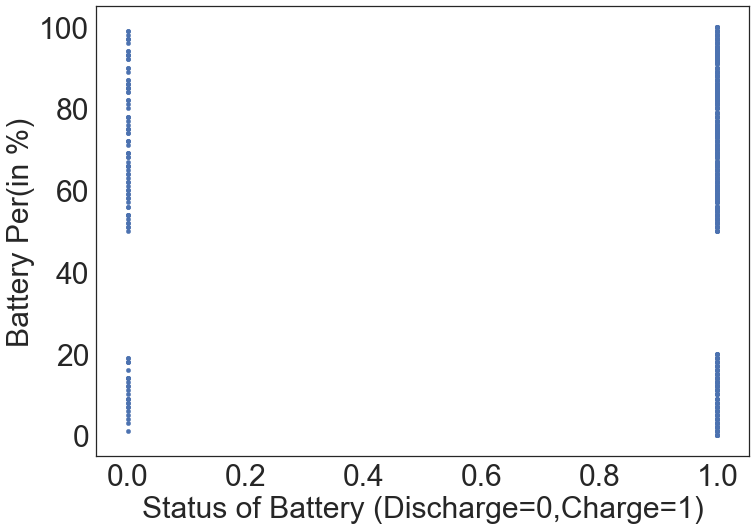

In [40]:
# Scatter Plot
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":30},style="white",font_scale = 3)

a.plot(kind='scatter',x='Status of Battery (Discharge=0,Charge=1)',y='Battery Per(in %)');
plt.show()

## Bar Plot

<module 'matplotlib.pyplot' from 'C:\\Users\\raksh\\Anaconda3 desktop\\lib\\site-packages\\matplotlib\\pyplot.py'>

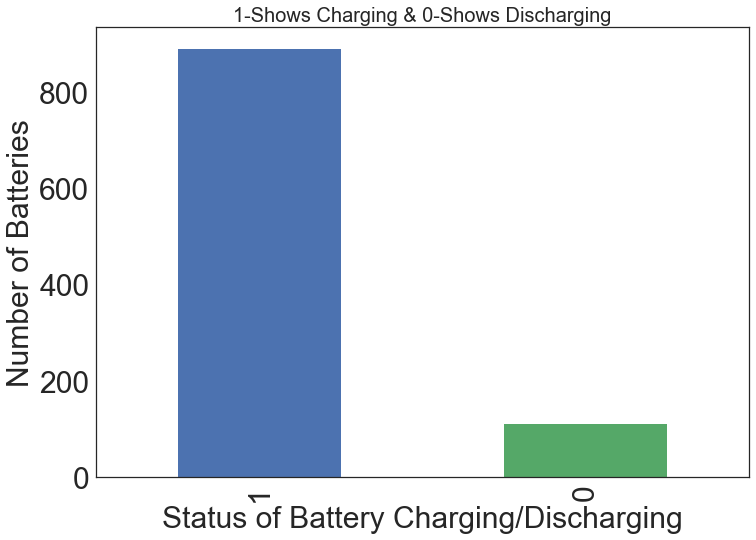

In [41]:
count_status = pd.value_counts(a['Status of Battery (Discharge=0,Charge=1)'])
count_status.plot(kind = 'bar')
plt.title("1-Shows Charging & 0-Shows Discharging")
plt.xlabel("Status of Battery Charging/Discharging")
plt.ylabel("Number of Batteries")
plt

## Pair Plots

<module 'matplotlib.pyplot' from 'C:\\Users\\raksh\\Anaconda3 desktop\\lib\\site-packages\\matplotlib\\pyplot.py'>

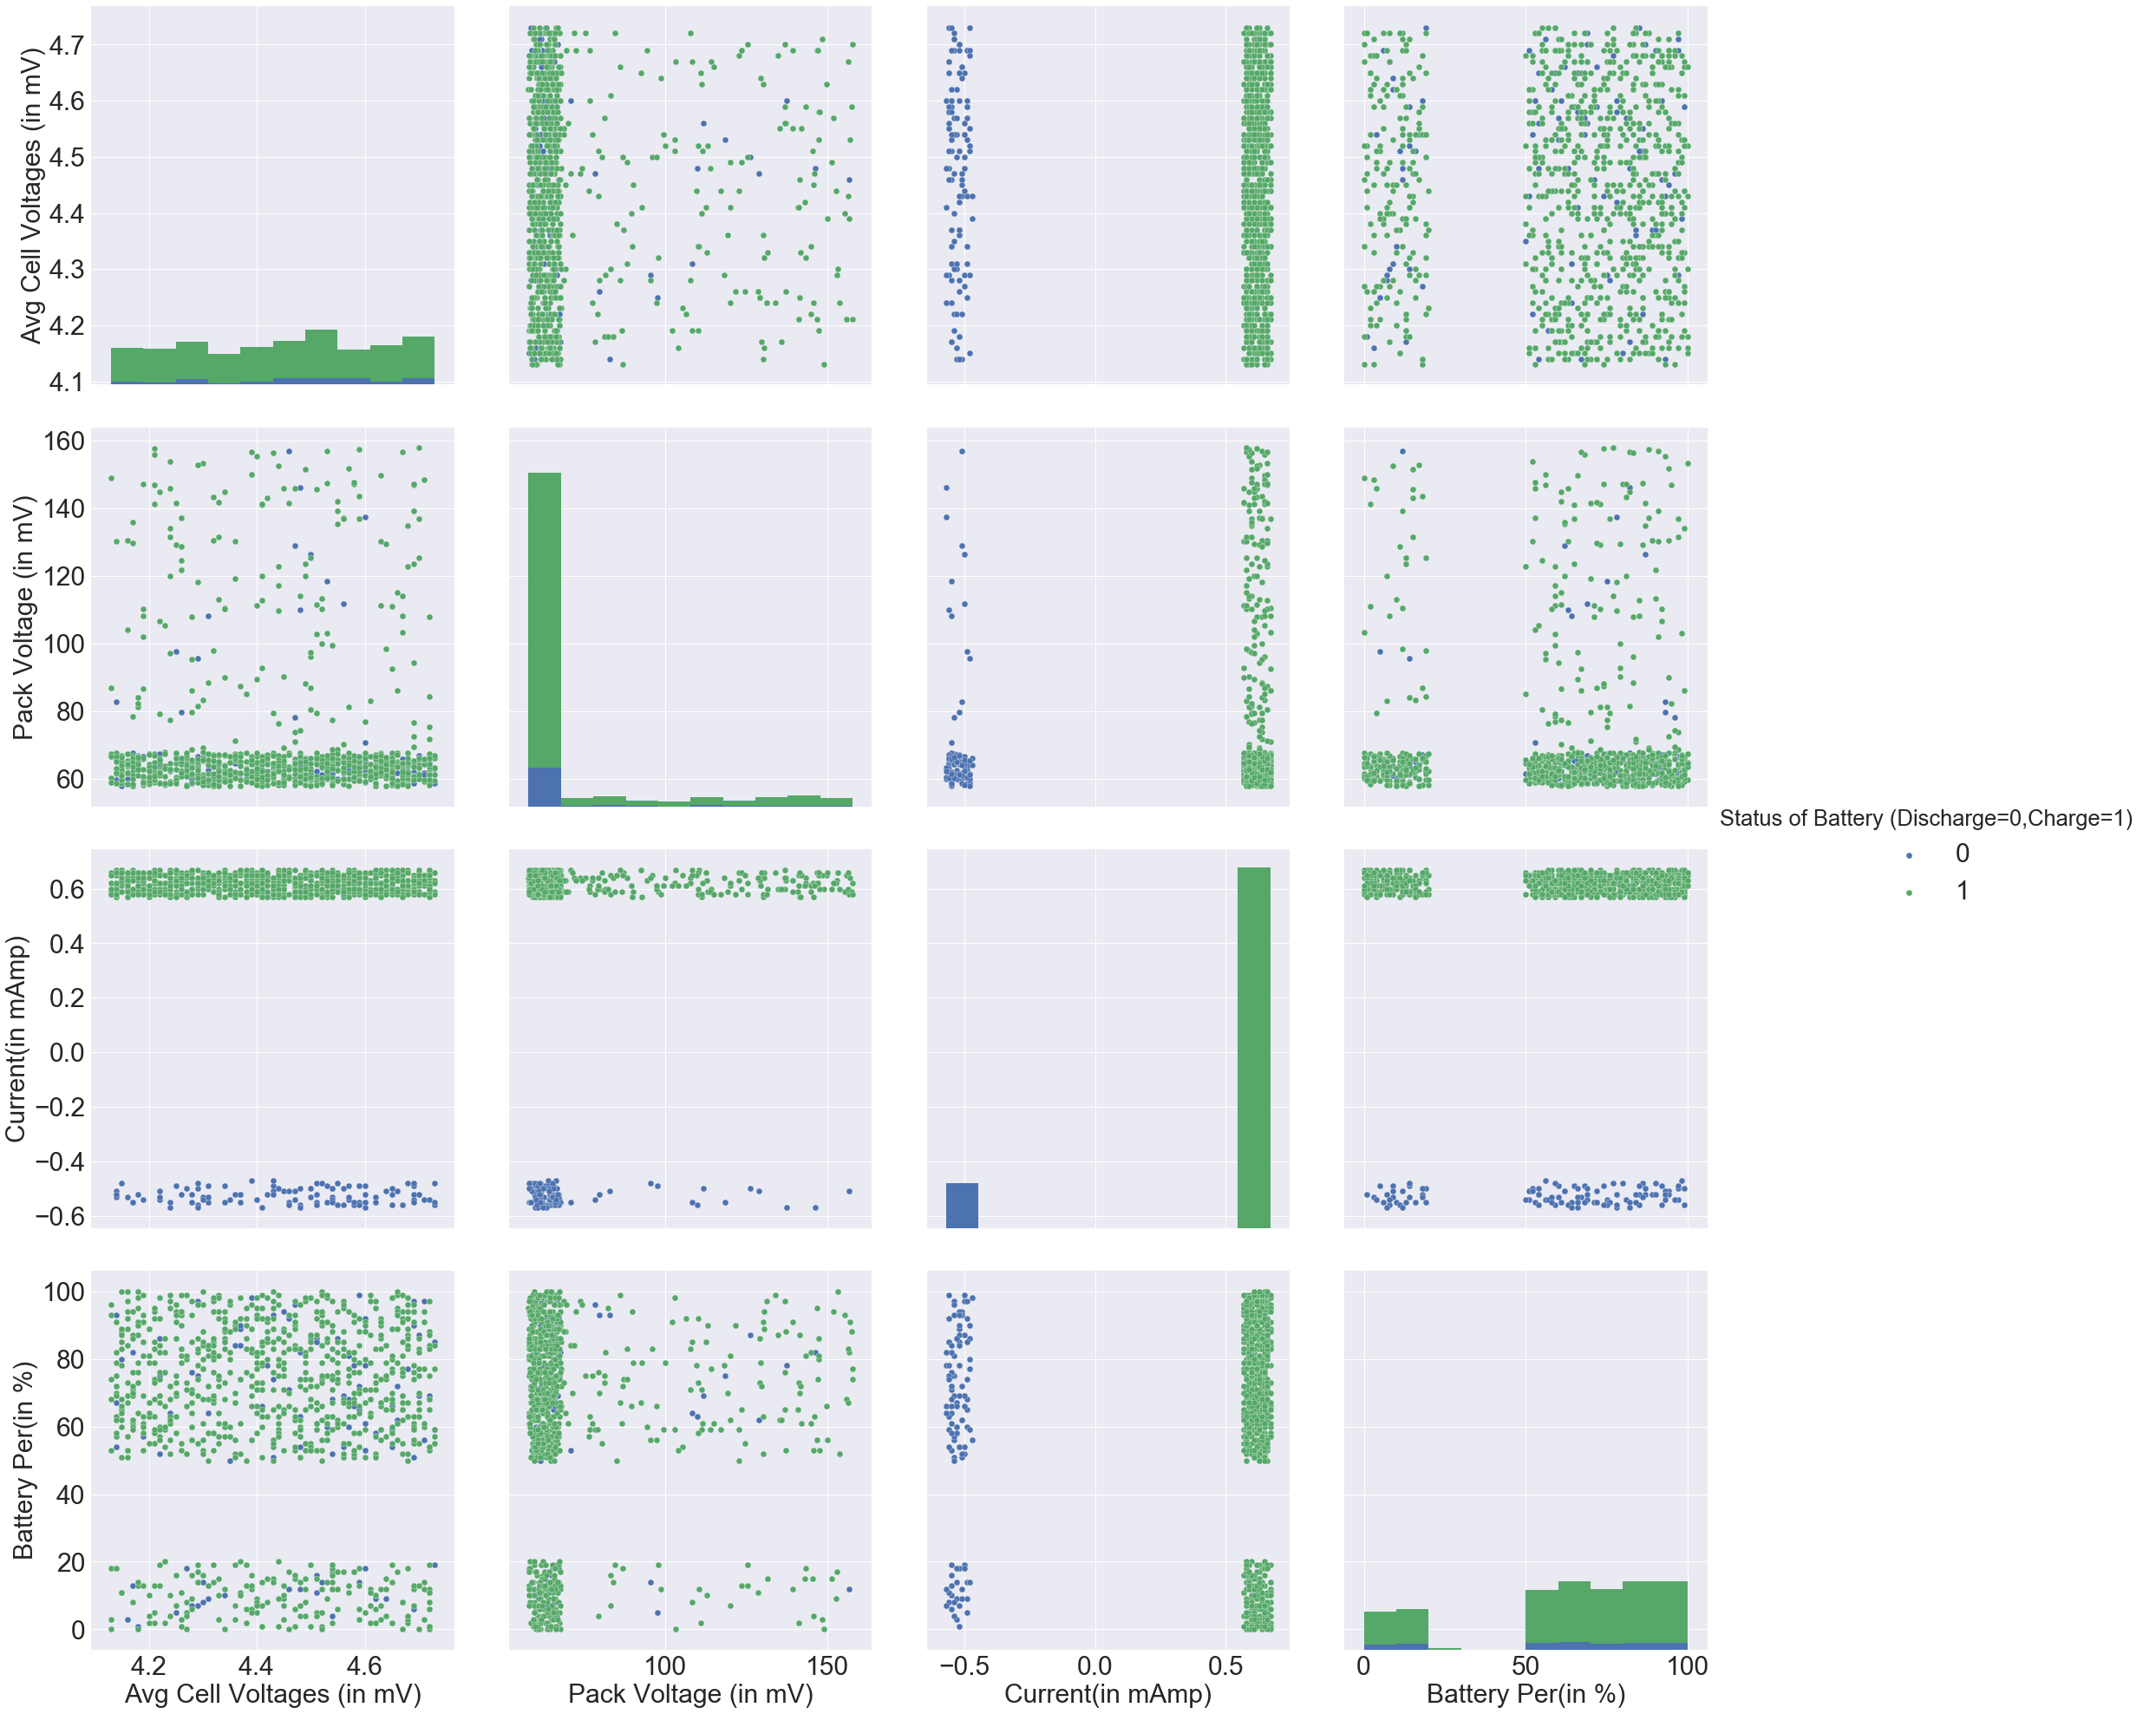

In [42]:
sns.color_palette("Paired")
sns.set_style("darkgrid");
sns.pairplot(a,hue='Status of Battery (Discharge=0,Charge=1)',vars=['Avg Cell Voltages (in mV)','Pack Voltage (in mV)'
             ,'Current(in mAmp)', 'Battery Per(in %)'], aspect=1,size=7);
plt

## So we can also add one more column to our data i.e- location of the device With help of latitude & longitude, but that code for 1000 rows will take a decent amount of time (10-15 min Approx), So here I have taken few rows to show what it looks like.

In [43]:
del lst2[10:1000]
   
f= int(input("Enter 1 if you want location:"))
if f==1:
    
    for x,y in  (lst2):
        #print(x,y)
        geolocator = Nominatim(user_agent="geoapiExercises")
        location = geolocator.reverse(x+","+y)

        address = location.raw['address']
                        #print(address)
                        # traverse the 
        location=address.get('suburb')
        city = address.get('city')
        state = address.get('state', '')
        country = address.get('country', '')
        code = address.get('country_code')
        zipcode = address.get('postcode')
        print('Latitude :' ,x,'\n' 'Longitude :',y)
        print('Location :',location)
        print('City : ', city)
        print('State : ', state)
        print('Country : ', country)
        print('Zip Code : ', zipcode)
        print('***************************')


Enter 1 if you want location:1
Latitude : 33.064622 
Longitude : 89.997658
Location : None
City :  安多县
State :  西藏自治区
Country :  中国
Zip Code :  None
***************************
Latitude : 33.167156 
Longitude : 89.576907
Location : None
City :  None
State :  
Country :  中国
Zip Code :  None
***************************
Latitude : 33.114074 
Longitude : 89.727909
Location : None
City :  None
State :  西藏自治区
Country :  中国
Zip Code :  None
***************************
Latitude : 32.866102 
Longitude : 89.215852
Location : None
City :  None
State :  西藏自治区
Country :  中国
Zip Code :  None
***************************
Latitude : 32.842843 
Longitude : 89.836060
Location : None
City :  None
State :  西藏自治区
Country :  中国
Zip Code :  None
***************************
Latitude : 33.190273 
Longitude : 89.782705
Location : None
City :  None
State :  西藏自治区
Country :  中国
Zip Code :  None
***************************
Latitude : 33.317115 
Longitude : 89.996243
Location : None
City :  None
State :  西藏自治区
Count